In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# finding the length of the dataset
len(df)

8807

In [5]:
# checking the data types of each series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# finding the count of null values in each series
df.isnull().sum(axis=0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# un-nesting the directors column
constraint1 = df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [8]:
# un-nesting the cast column
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [9]:
#unnesting the country column
constraint3=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'country'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [10]:
#unnesting the listed_in column
constraint4=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'Genre'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [11]:
# merging all the un-nested dataframes into one
df_new=df_new1.merge(df_new2,on='title',how='left')
df_new=df_new.merge(df_new3,on='title',how='left')
df_new=df_new.merge(df_new4,on='title',how='left')
df_new.head()

,title,Directors,Actors,country,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows


In [12]:
#merging our unnested data with the original data
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [13]:
# checking the null values in the final dataset
df_final.isnull().sum()

title             0
Directors         0
Actors            0
country           0
Genre             0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [14]:
df_final.replace('nan', np.nan,inplace= True)

In [15]:
df_final.isnull().sum()

title               0
Directors       50643
Actors           2146
country         11897
Genre               0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [16]:
df_final['Directors'].replace(np.nan,'Unknown Director',inplace=True)
df_final['Actors'].replace(np.nan,'Unknown Actor',inplace=True)
# df_final['country'].replace(np.nan,'Unknown country',inplace=True)
df_final

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [17]:
df_final.isnull().sum()

title               0
Directors           0
Actors              0
country         11897
Genre               0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [18]:
df_final['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

In the duration column it was oberved that there are 3 null values, but in the corresponding ratings the values are in minutes. As the ratings cannot be in minutes, we can assume that these values are for the duration. So the duration column nulls are replaced by corresponding values in ratings column.

In [19]:
df_final['duration'] = df_final['duration'].where(~df_final['duration'].isnull(), df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
# Ratings can be in 'min' so changing them to NR(non-rated)
df_final['rating'].fillna('NR',inplace=True)
df_final.isnull().sum()

title               0
Directors           0
Actors              0
country         11897
Genre               0
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [20]:
#date added column is imputed on the basis of release year.
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    imputing_value=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imputing_value)

In [21]:
# imputing country column based on the directors column.
for i in df_final[df_final['country'].isnull()]['Directors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
        imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
        df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

In [22]:
df_final.isnull().sum()

title              0
Directors          0
Actors             0
country         4276
Genre              0
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

Even after imputing the country column by referring the directors, there are still some null values. Now lets impute the remaining null values in country column by referring Actors column

In [24]:
for i in df_final[df_final['country'].isnull()]['Actors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
        imp=df_final[df_final['Actors']==i]['country'].mode().values[0]
        df_final.loc[df_final['Actors']==i,'country']=df_final.loc[df_final['Actors']==i,'country'].fillna(imp)
#If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

title           0
Directors       0
Actors          0
country         0
Genre           0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [25]:
df_final.head()

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


Duration columns has two different type of data, one is in minutes and other is in seasons which makes it difficult to work on.

In [27]:
#removing mins from data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [28]:
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [155]:
# lets create bins for the duration column to make this more understandable as there are multiple distinct durations.
# To do that, we need to separate all the values that has 'Seasons' in it. So lets create a copy of duration column to seggregate them.
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [156]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head(5)

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [157]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-320']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [158]:
# Now lets copy all the duration ranges from the duration copy column to the original duration column and drop the later.
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [159]:
df_final1['duration'].value_counts()

duration
80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-320         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: count, dtype: int64

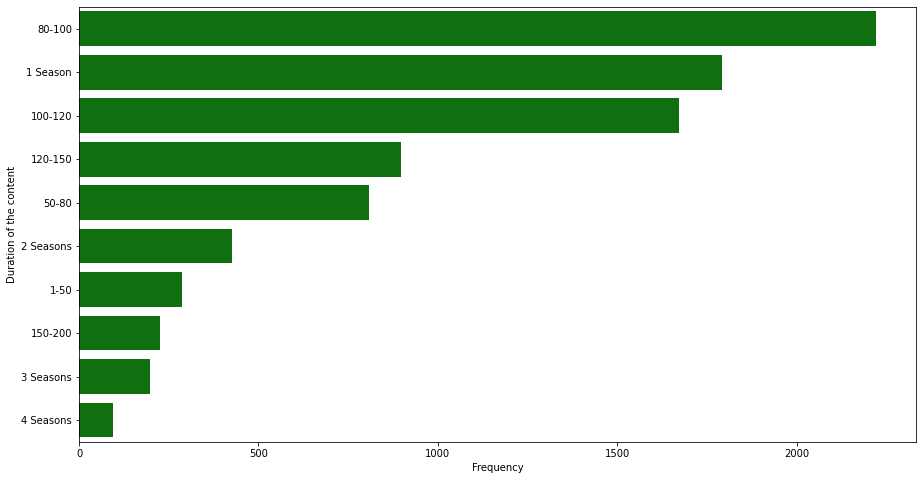

In [138]:
df_duration=df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
sns.barplot(data=df_duration, y='duration',x='title',orient='h',color='green')
plt.xlabel('Frequency')
plt.ylabel('Duration of the content')
plt.show()

It can be observed that most of the movies in Netflix has the duration of 80-150 mins.
Also a considerable amount of TV shows has only 1 season.

In [38]:
# finding number of distinct titles in each genre.
df_final1.groupby(['Genre']).agg({"title":"nunique"})

,title
Genre,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641
Classic & Cult TV,28
Classic Movies,116
Comedies,1674
Crime TV Shows,470


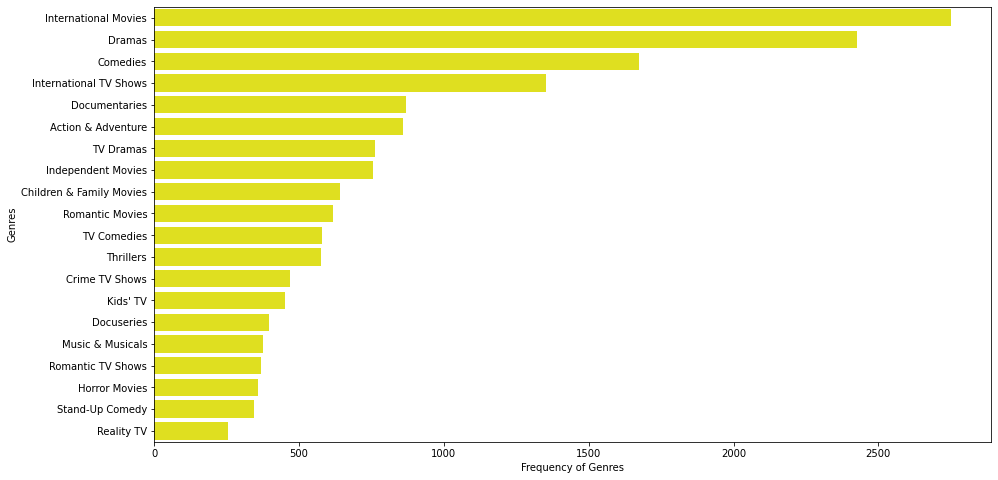

In [85]:
df_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by='title', ascending=False)[:20]
# df_genre=df_genre.sort_values(by='title', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(data=df_genre, y='Genre',x='title',orient='h',color='yellow')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International movies, Dramas, Comedies and International TV shows are more in number compared to the others on Netflix.
So, it can be observed that Netflix has been adding those shows/movies in high numbers.

In [73]:
# finding number of distinct titles for each country.
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


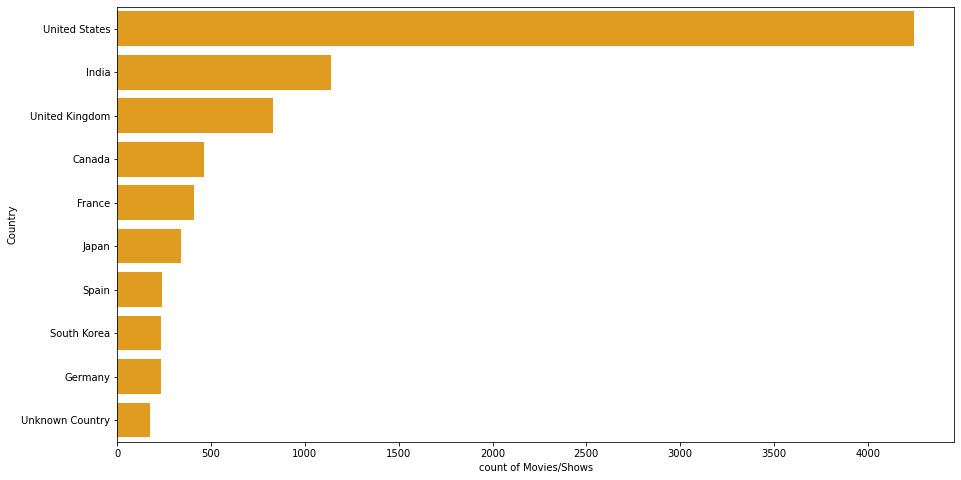

In [98]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by='title', ascending=False)[:10]
plt.figure(figsize=(15,8))
sns.barplot(data=df_country, y='country',x='title',orient='h',color='orange')
plt.xlabel('count of Movies/Shows')
plt.ylabel('Country')
plt.show()

Most of the content on Netflix is from the countries USA, India, UK, Canada, France and Japan.

In [ ]:
# finding the number of distinct titles under each rating group.
df_final1.groupby(['rating']).agg({"title":"nunique"})

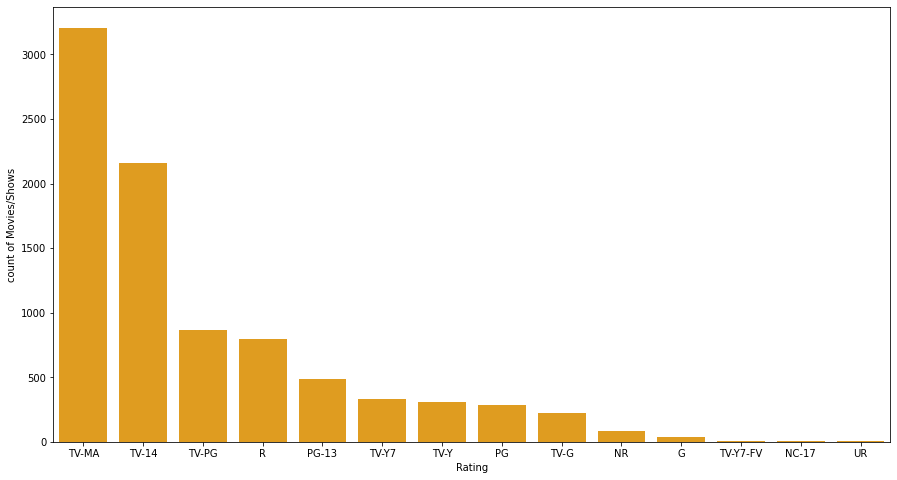

In [90]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by='title', ascending=False)[:20]
plt.figure(figsize=(15,8))
sns.barplot(data=df_rating, x='rating',y='title',color='orange')
plt.xlabel('Rating')
plt.ylabel('count of Movies/Shows')
plt.show()

Most of the content on Netflix is intended for Mature Audiences(TV-MA), R Rated, content that requires Parental Guidance.

In [79]:
df_final1.head()

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [71]:
# finding the count of movies and TV shows in the entire dataset.
df_final1.groupby(['type']).agg({"title":"nunique"})

,title
type,
Movie,6131
TV Show,2676


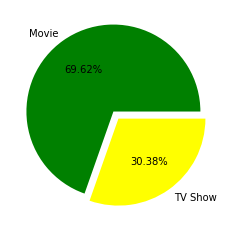

In [101]:
df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['green','yellow'],autopct='%.02f%%')
plt.show()

70% of the content in Netflix are movies while the remaining 30% are TV shows.

In [204]:
df_movies=df_final1[df_final1['type']=='Movie']
df_shows=df_final1[df_final1['type']=='TV Show']

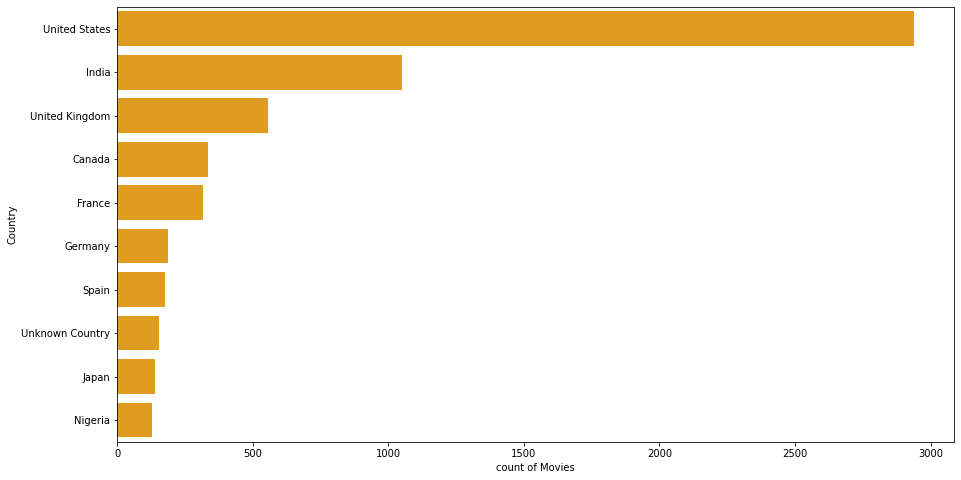

In [107]:
df_movie_country=df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
sns.barplot(data=df_movie_country, y='country',x='title',orient='h',color='orange')
plt.xlabel('count of Movies')
plt.ylabel('Country')
plt.show()

USA, India & UK has more movies in Netflix.

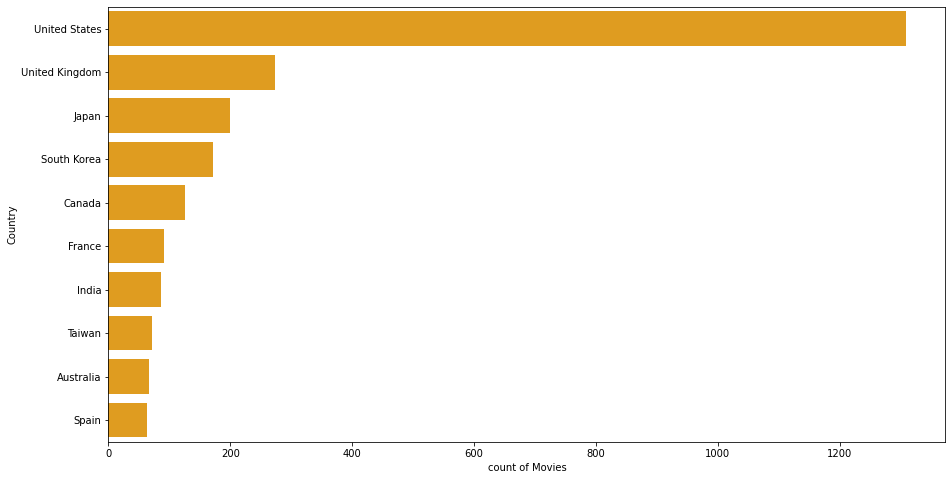

In [108]:
df_shows_country=df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
sns.barplot(data=df_shows_country, y='country',x='title',orient='h',color='orange')
plt.xlabel('count of Movies')
plt.ylabel('Country')
plt.show()

USA, UK, Japan & South Korea has more TV shows in Netflix.

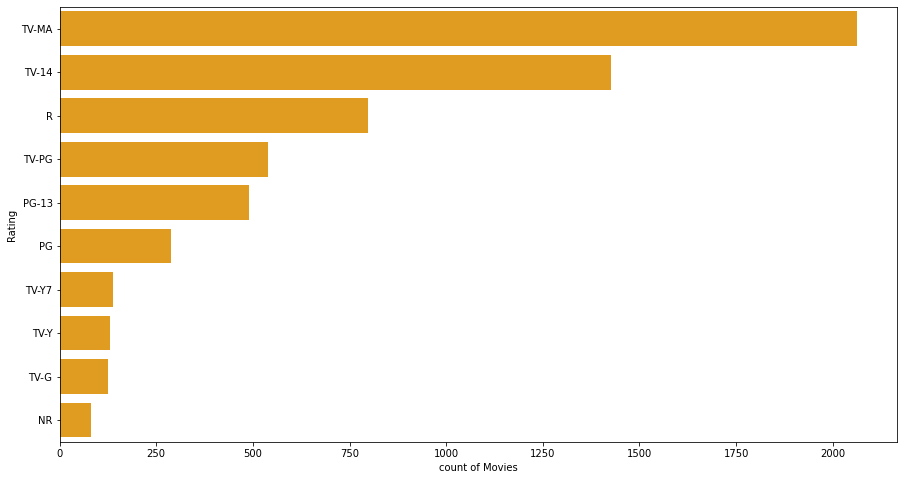

In [109]:
# finding the frequency of ratings of all the movies in Netflix
df_movie_ratings=df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
sns.barplot(data=df_movie_ratings, y='rating',x='title',orient='h',color='orange')
plt.xlabel('count of Movies')
plt.ylabel('Rating')
plt.show()

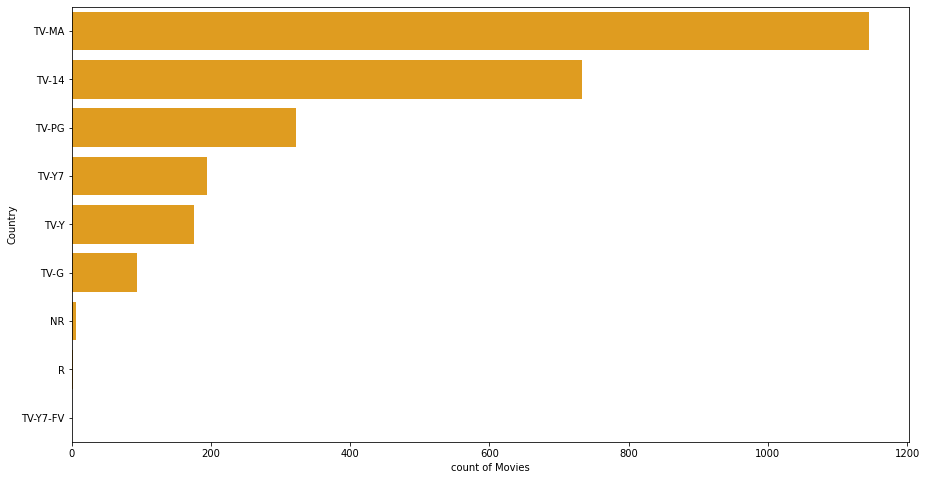

In [110]:
# finding the frequency of ratings of all the TV shows in Netflix.
df_shows_rating=df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
sns.barplot(data=df_shows_rating, y='rating',x='title',orient='h',color='orange')
plt.xlabel('count of Movies')
plt.ylabel('Country')
plt.show()

Most of the movies and TV shows in Netflix are either for matured audience or require a parental guidence to watch.

In [161]:
# Converting date_added column data to a readable format so that we can separte the date, week and year from that.
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
  x=parse(i)
  arr.append(x.strftime('%Y-%m-%d'))
df_final1['Formatted_Added_date'] =arr
df_final1['Formatted_Added_date']=pd.to_datetime(df_final1['Formatted_Added_date'])
df_final1['week_Added']=df_final1['Formatted_Added_date'].dt.isocalendar().week
df_final1['month_added']=df_final1['Formatted_Added_date'].dt.month
df_final1['year_added']=df_final1['Formatted_Added_date'].dt.year
df_final1.head()

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration,Formatted_Added_date,month_added,week_Added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [162]:
# finding the number of movies/shows added to Netflix per each year.
df_final1.groupby(['year_added']).agg({"title":"nunique"})

,title
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,432


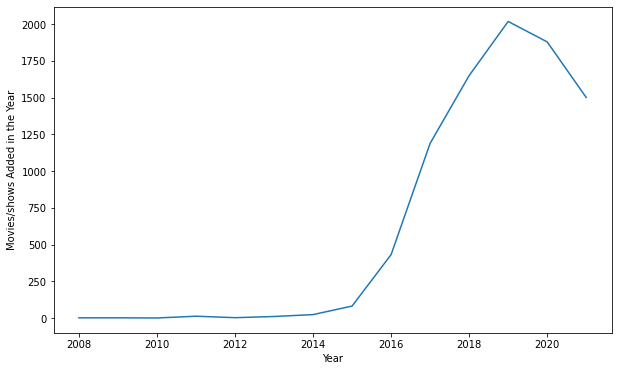

In [194]:
df_year=df_final1.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel("Movies/shows Added in the Year")
plt.xlabel("Year")
plt.show()

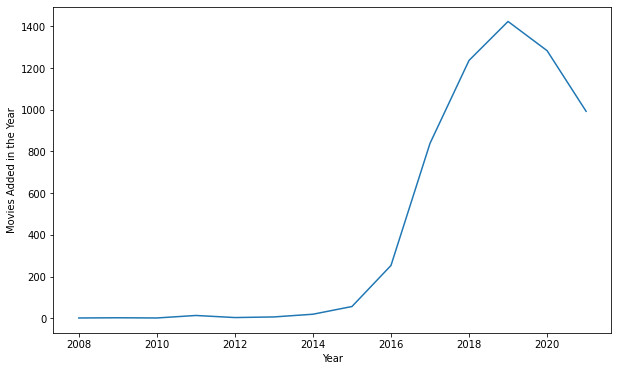

In [200]:
# finding the number of movies added to Netflix per each year.
df_year_movies=df_movies.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year_movies, x='year_added', y='title')
plt.ylabel("Movies Added in the Year")
plt.xlabel("Year")
plt.show()

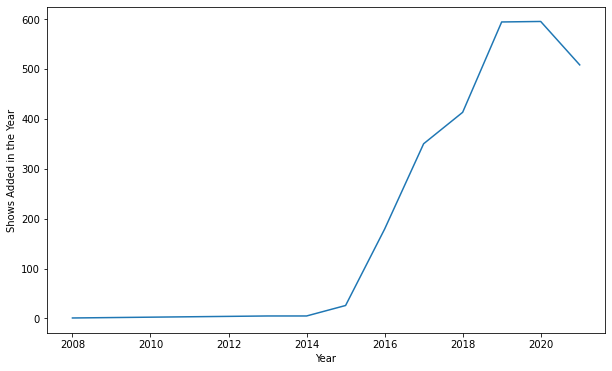

In [202]:
# finding the number of shows added to Netflix per each year.
df_year_shows=df_shows.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year_shows, x='year_added', y='title')
plt.ylabel("Shows Added in the Year")
plt.xlabel("Year")
plt.show()

It can be observed that more content is being added every year until 2020. For years 2020 & 2021 the amount of content that was added has gone down.

In [164]:
# finding the total number of movies/shows added to Netflix per each week in all the years.
df_final1.groupby(['week_Added']).agg({"title":"nunique"})

,title
week_Added,
1,372
2,108
3,113
4,88
5,208
6,97
7,147
8,110
9,254


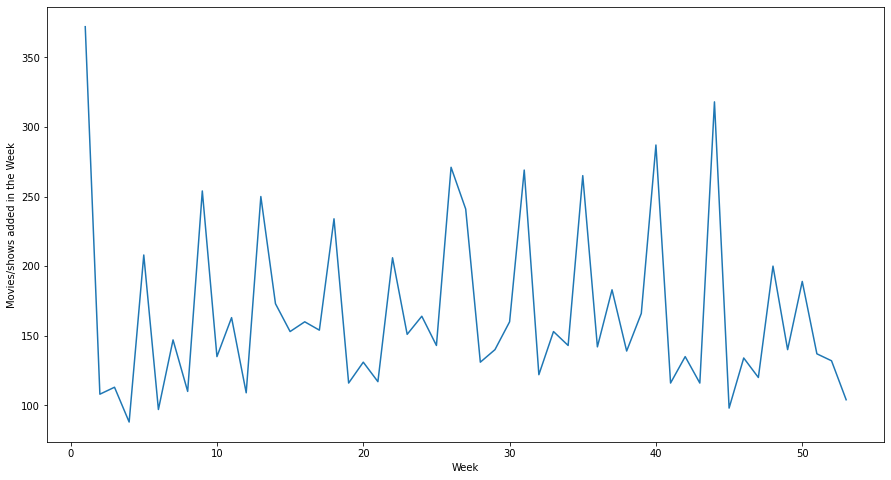

In [205]:
df_week=df_final1.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
plt.plot(df_week['week_Added'], df_week['title'])
plt.ylabel("Movies/shows added in the Week")
plt.xlabel("Week")
plt.show()

Most of the Content across Netflix is added in the first week of the year

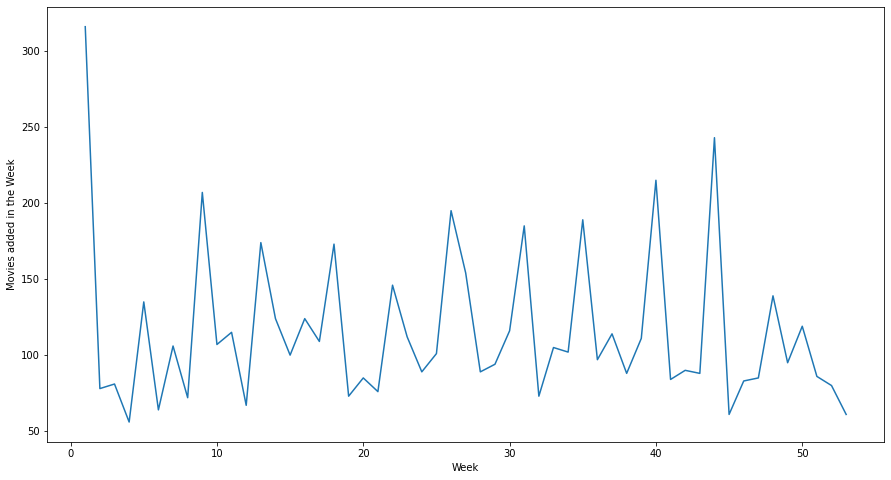

In [211]:
# finding the total number of movies added to Netflix per each week in all the years.
df_week_movies=df_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
plt.plot(df_week_movies['week_Added'], df_week_movies['title'])
plt.ylabel("Movies added in the Week")
plt.xlabel("Week")
plt.show()

Quite a number of movies are added in 1st week of the year

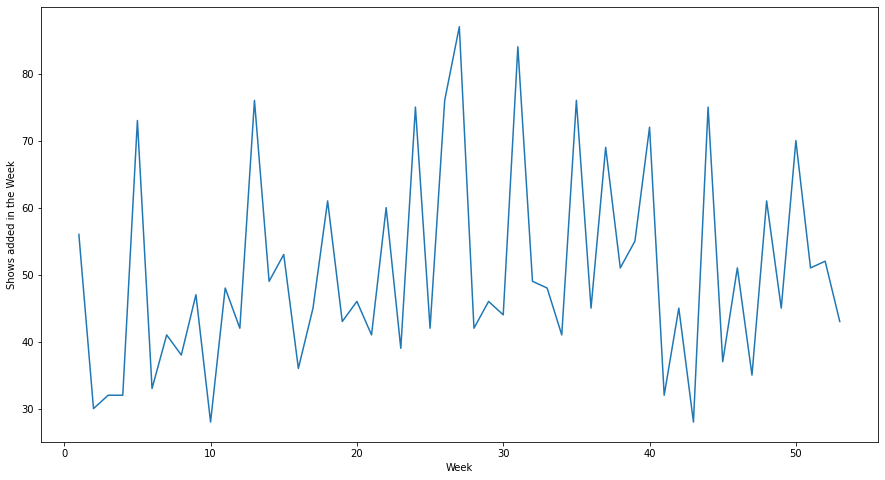

In [210]:
# finding the total number of shows added to Netflix per each week in all the years.
df_week_shows=df_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
plt.plot(df_week_shows['week_Added'], df_week_shows['title'])
plt.ylabel("Shows added in the Week")
plt.xlabel("Week")
plt.show()

More number of TV shows are added in mid year.

In [173]:
# finding the total number of movies/shows added to Netflix per each month in all the years.
df_final1.groupby(['month_added']).agg({"title":"nunique"})

,title
month_added,
1,738
2,563
3,742
4,765
5,632
6,728
7,832
8,756
9,772


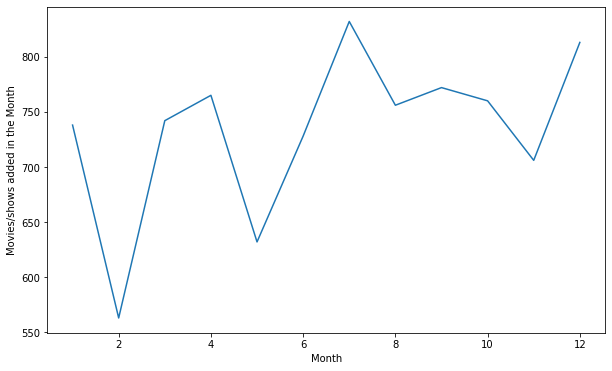

In [175]:
df_month=df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies/shows added in the Month")
plt.xlabel("Month")
plt.show()

Most of the content(Movies/shows) are added in 7th and last month of the year.

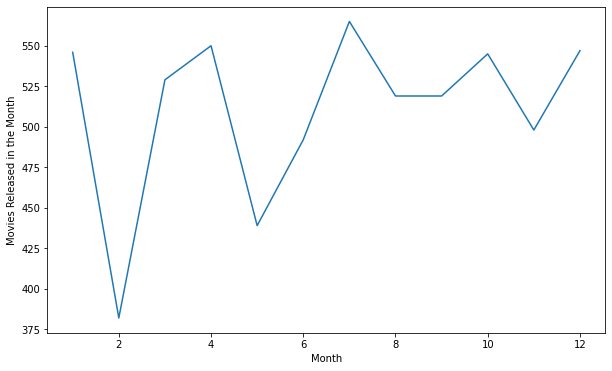

In [214]:
# finding the total number of movies added to Netflix per each month in all the years.
df_month_movies=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_month_movies, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

Movies are being added to Netflix in a cyclical manner, peaking once in every 2 months.

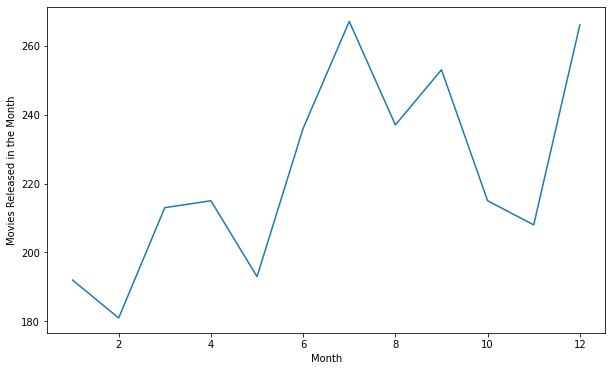

In [215]:
# finding the total number of shows added to Netflix per each month in all the years.
df_month_shows=df_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df_month_shows, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV shows are being added to Netflix in the mid or the end of the year(July, December)

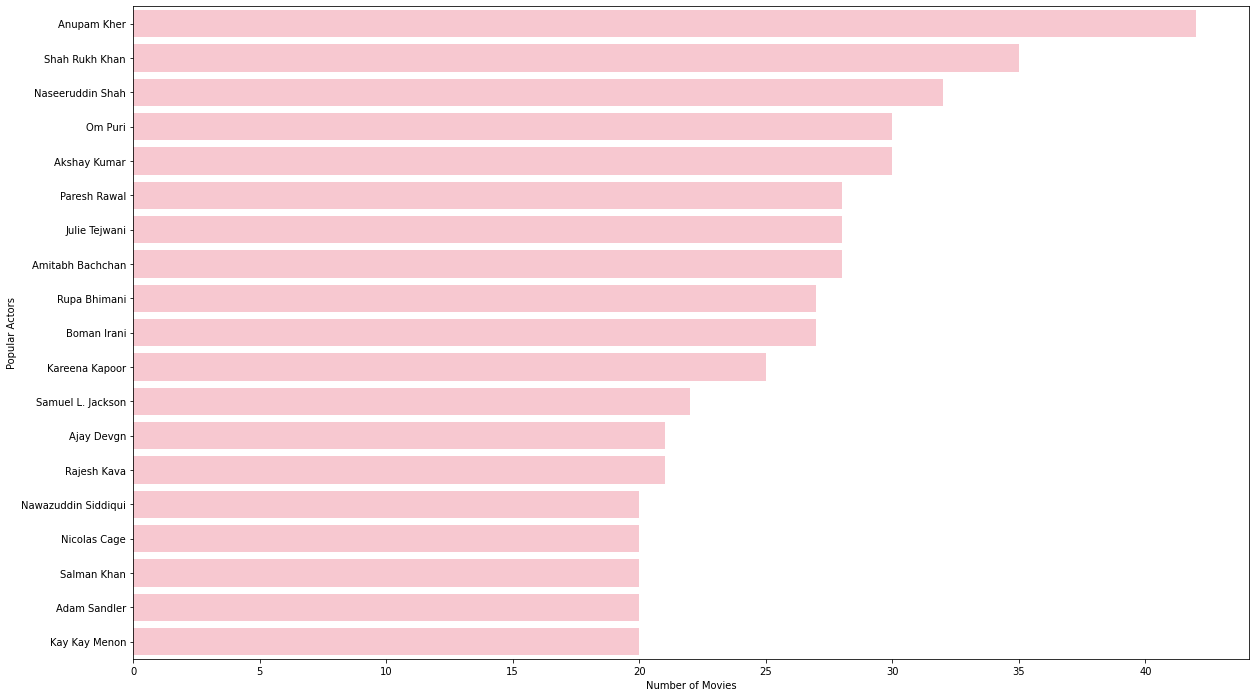

In [187]:
# finding the popular actors in movies in the data all over the world.
df_actors_movies=df_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_actors_movies=df_actors_movies[df_actors_movies['Actors']!='Unknown Actor']
plt.figure(figsize=(20,12))
sns.barplot(data=df_actors_movies, y='Actors',x='title',orient='h',color='pink')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

From the above plot it can be observed that more number of Indian movies are being added to Netflix, due to which many of the popular actors are from India.

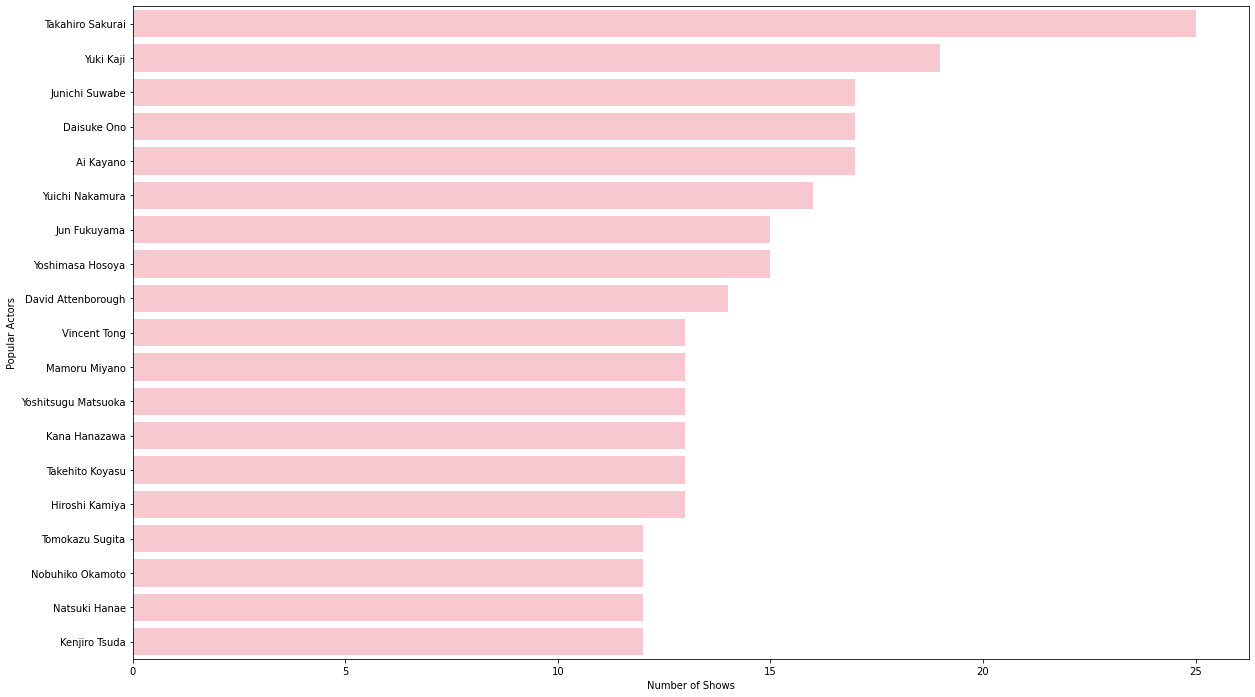

In [188]:
# finding the popular actors in movies in the data all over the world.
df_actors_shows=df_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
df_actors_shows=df_actors_shows[df_actors_shows['Actors']!='Unknown Actor']
plt.figure(figsize=(20,12))
sns.barplot(data=df_actors_shows, y='Actors',x='title',orient='h',color='pink')
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

Most of the popular actors are voice actors/actors from Japan and South Korea, which is reflecting the number of TV shows from Japan and Korea being added to Netflix

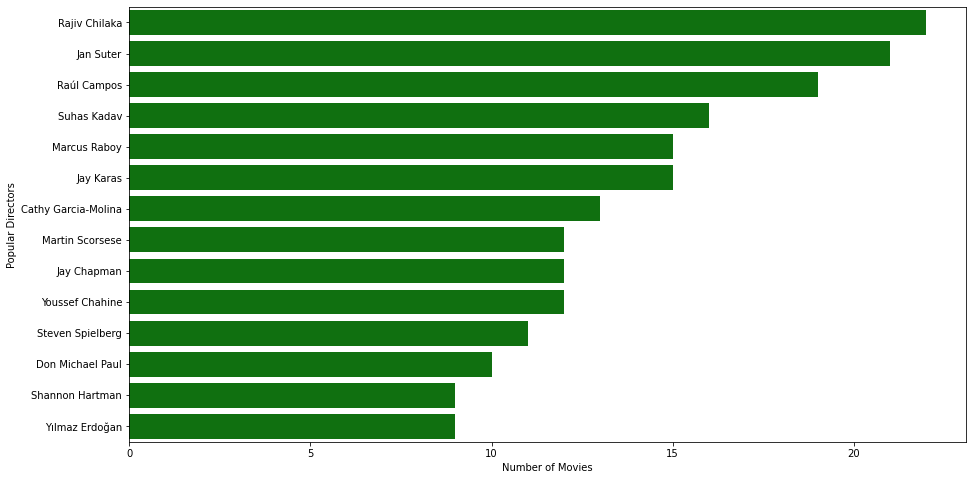

In [189]:
# finding the popular directors in movies in the data from over the world.
df_directors=df_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
sns.barplot(data=df_directors, y='Directors',x='title',orient='h',color='Green')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

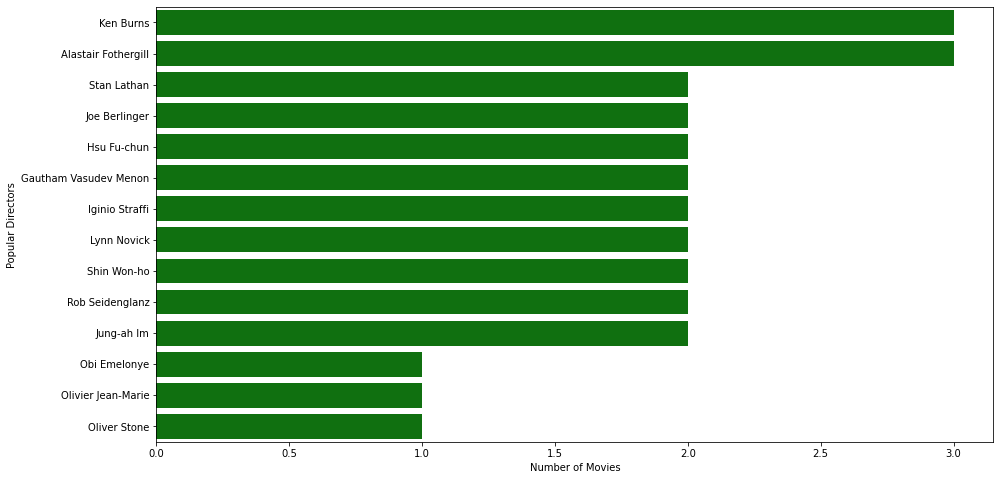

In [192]:
# finding the popular directors in movies in the data from over the world.
df_directors=df_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
sns.barplot(data=df_directors, y='Directors',x='title',orient='h',color='Green')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [217]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


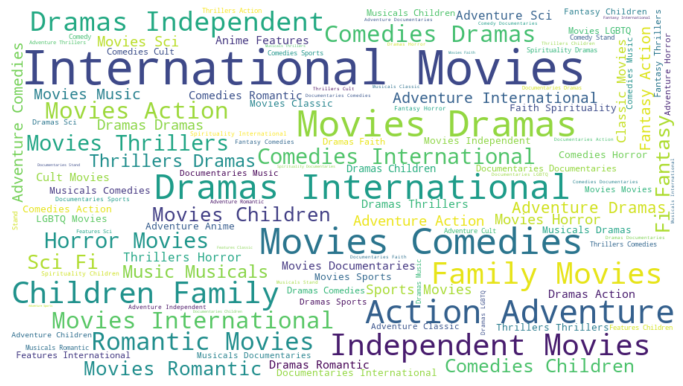

In [227]:
from wordcloud import WordCloud

# Concatenating all genre values into a single string
all_genres = ' '.join(df_movies['Genre'])

# Create a WordCloud object
wordcloud = WordCloud(width=900, height=500, background_color='white').generate(all_genres)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [228]:
df_movies.head()

,title,Directors,Actors,country,Genre,show_id,type,date_added,release_year,rating,duration,Formatted_Added_date,month_added,week_Added,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021
160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021
161,My Little Pony: A New Generation,Robert Cullen,James Marsden,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021
162,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,United States,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,80-100,2021-09-24,9,38,2021


In [231]:
df_movies['release_year'].unique()

array([2020, 2021, 1993, 1996, 1998, 1997, 2010, 2013, 2017, 1975, 1978,
       1983, 1987, 2012, 2001, 2002, 2003, 2004, 2011, 2008, 2009, 2007,
       2005, 2006, 2018, 2019, 1994, 2015, 1982, 1989, 2014, 1990, 1991,
       1999, 2016, 1986, 1984, 1980, 1961, 2000, 1995, 1985, 1992, 1976,
       1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963, 1970,
       1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968, 1965,
       1945, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

# Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data) 

From the above movies data it can be observed that there is only release year, but no release date and month.
So its not ideal to assume the release date & month for each movie.
Also finding the difference between the year of release date and added_year doesnt paint a clear picture because there might be many movies being released at the end of this year and added to Netflix next year.
In this case the difference will be 1 year but in reality it is much lesser than a year.

# Insights and Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are
Drama, Comedy and International TV Shows/Movies. So producing/acquiring content belonging to these genres is recommended.

2) Movies with in the duration range of 80-150 mins are popular in Netflix. So producing the content in this duration range is recommended.

3) USA, India & UK has more movies while USA, UK, Japan & South Korea has more TV shows in Netflix.

4) Quite a number of movies are added in 1st week of the year. So it is the best time to add movies to Netflix.

5) Best time to add TV shows is the mid or the end of the year.